# Membership Segmentation

### In this file, we will be segmenting our data on the basis of membership. This will allow us to see differences in ridership behaviour on various metrics

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_parquet("2023.parquet", engine = "pyarrow")

## Number of rides & Membership

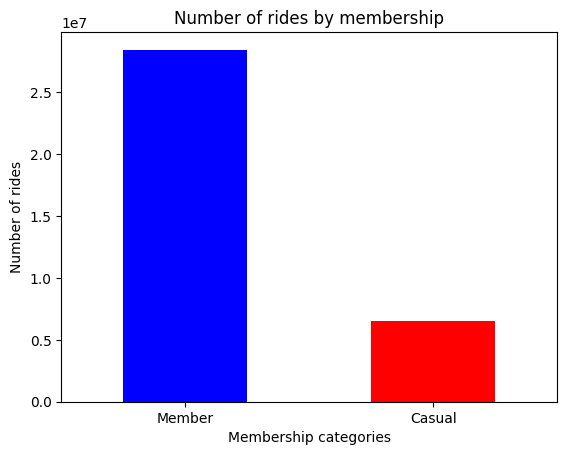

In [77]:
df['member_casual'].value_counts().plot(kind = "bar", color = ["blue", "red"])
plt.title("Number of rides by membership")
plt.xlabel("Membership categories")
plt.xticks(rotation = 0, ticks = range(2), labels = ["Member", "Casual"])
plt.ylabel("Number of rides")
plt.show()

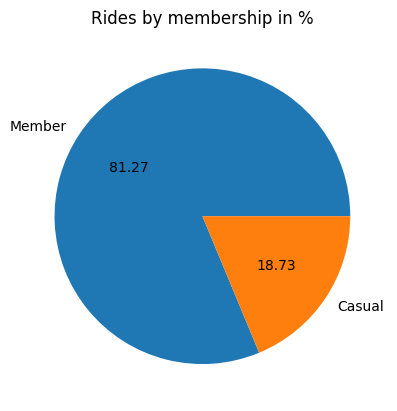

In [76]:
df['member_casual'].value_counts().plot(kind = "pie", autopct = '%1.2f', labels = ['Member', 'Casual'])
plt.title("Rides by membership in %")
plt.ylabel("")
plt.show()

# Trends by membership

In [45]:
member = df[df['member_casual'] == "member"]
casual = df[df['member_casual'] == "casual"]

## Hour of day & Membership

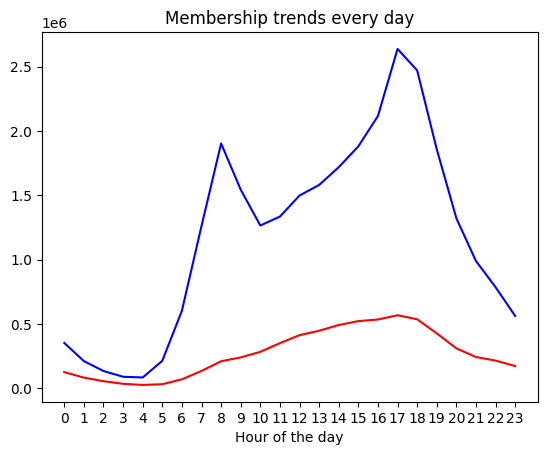

In [46]:
member['hour'].value_counts().sort_index().plot(kind = "line", color = "blue")
casual['hour'].value_counts().sort_index().plot(kind = "line", color = "red")
plt.xticks(ticks = range(24))
plt.xlabel("Hour of the day")
plt.title("Membership trends every day")
plt.show()

### Insight:

Ridership by members peaks at 8AM and 5PM, supporting the hypothesis that members use bikes to travel to and from work in the morning and evening

Ridership by casual riders, tends to remain consistent throughout the day and doesnt have clear peaks, however it is at its maximum at 5PM

## Day of week & Membership

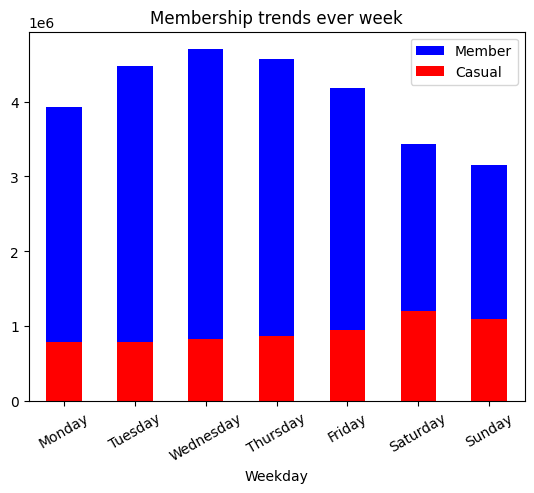

In [47]:
member['weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind = "bar", color = "blue", label = "Member")
casual['weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind = "bar", color = "red", label = "Casual")
plt.title("Membership trends ever week")
plt.legend()
plt.xlabel("Weekday")
plt.xticks(rotation = 30)
plt.show()

This suggests there is some correlation between membership type and what day of the week it is. 
Let us conduct a Chi-Squared test of independance as well

In [65]:
contingency = pd.crosstab(df['member_casual'], df['weekday'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 437587.22315484745, p-value: 0.0


### Insight: 

The Chi-Squared test suggests that there is statistically significant association between the day of the week and the number of rides by members and non-members. Members tend to ride more on weekdays and less on weekends, whereas casual riders tends to ride more on weekends, suggesting members primarily use the service for commuting whereas casual riders tend to use the service casually on holidays

## Holidays & Membership

/var/folders/3r/5kfvm8sd25v522wh526y75lw0000gn/T/ipykernel_58877/2924000238.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['is_holiday', 'member_casual']).size().unstack()


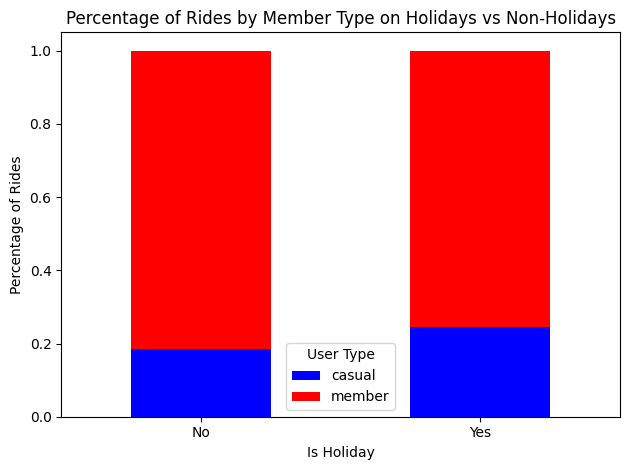

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

counts = df.groupby(['is_holiday', 'member_casual']).size().unstack()

percentages = counts.div(counts.sum(axis=1), axis=0)

percentages.plot(kind='bar', stacked=True, color=['blue', 'red'])

plt.title("Percentage of Rides by Member Type on Holidays vs Non-Holidays")
plt.xlabel("Is Holiday")
plt.ylabel("Percentage of Rides")
plt.xticks(ticks = [0,1], labels = ['No', 'Yes'], rotation=0)
plt.legend(title = 'User Type', loc = 'best')
plt.tight_layout()
plt.show()


In [71]:
contingency = pd.crosstab(df['member_casual'], df['is_holiday'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 22629.479812243088, p-value: 0.0


### Insight: 

The Chi-Squared test for independence between is_holiday and member_casual yields a statistic of 22,000 and a p-value ≈ 0, indicating a statistically significant association. Casual riders are disproportionately more active on holidays compared to members, who show more consistent behavior.

## Ride duration & Membership

Text(0.5, 0, 'Membership type')

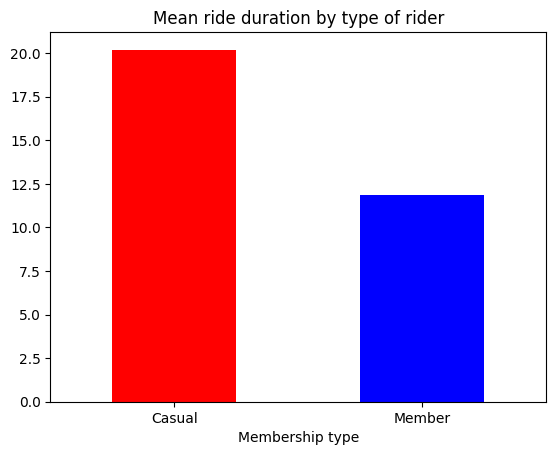

In [79]:
df.groupby("member_casual")['duration_minutes'].mean().plot(kind = "bar", color = ["red", "blue"])
plt.title("Mean ride duration by type of rider")
plt.xticks(ticks = range(2), labels = ["Casual", "Member"], rotation = 0)
plt.xlabel("Membership type")

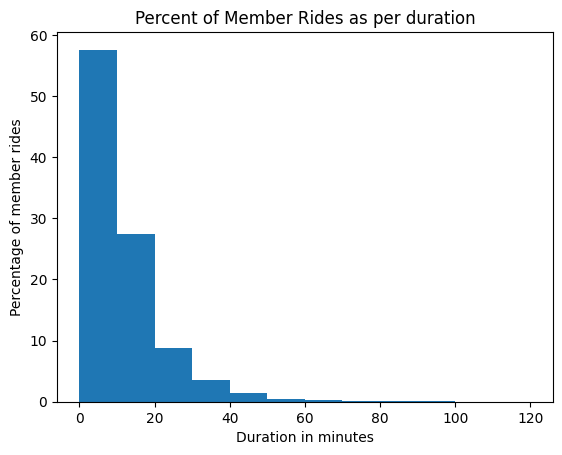

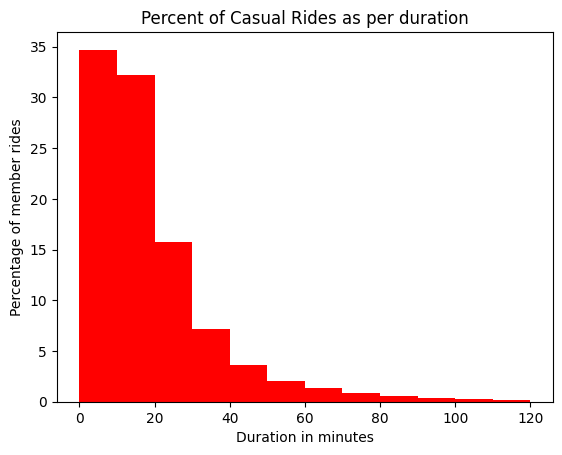

In [80]:
weight = (np.ones(len(member)) * 100) / len(member)
member['duration_minutes'].plot(kind = "hist", weights = weight, bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,float('inf')]) 
plt.title("Percent of Member Rides as per duration")
plt.xlabel("Duration in minutes")
plt.ylabel("Percentage of member rides")
plt.show()


weight = (np.ones(len(casual)) * 100) / len(casual)
casual['duration_minutes'].plot(kind = "hist", weights = weight, bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,float('inf')], color = "red") 
plt.title("Percent of Casual Rides as per duration")
plt.xlabel("Duration in minutes")
plt.ylabel("Percentage of member rides")
plt.show()


### Insight:

Member ride durations are heavily concentrated under 20 minutes, peaking under 10 with a sharp drop off after that. In contrast, casual riders display a longer tailed distribution with many rides stretching beyond 20 minutes. This supports the hypothesis that members tend to be frequent, utility based users whereas casual riders are leisure-based in their usage

### Membership trends by starting borough

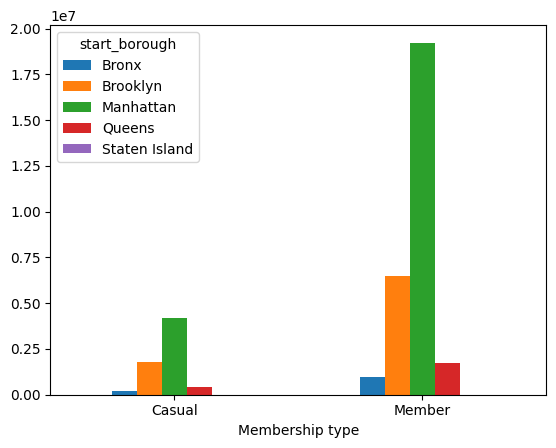

In [81]:
df.groupby(['member_casual', 'start_borough']).size().unstack().plot(kind = "bar")
plt.xlabel("Membership type")
plt.xticks(ticks = range(2), labels = ["Casual", "Member"], rotation = 0)
plt.show()

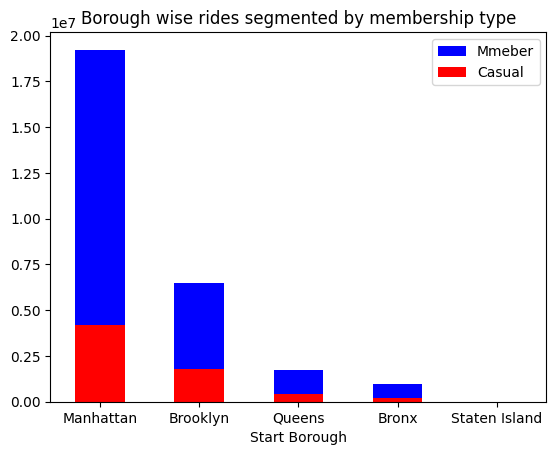

In [75]:
member['start_borough'].value_counts().plot(kind = "bar", color = "blue", label = "Mmeber")
casual['start_borough'].value_counts().plot(kind = "bar", color = "red", label = "Casual")
plt.title("Borough wise rides segmented by membership type")
plt.xlabel("Start Borough")
plt.xticks(rotation = 0)
plt.legend()
plt.show()

In [73]:
contingency = pd.crosstab(df['member_casual'], df['start_borough'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 61887.08228890419, p-value: 0.0


### Insight:

The distribution of ride start boroughs varies significantly by membership type. While both groups start most rides in Manhattan, casual riders are disproportionately more concentrated there and are underrepresented in outer boroughs. This pattern is statistically significant (Chi² = 61,887, p < 0.001), suggesting geographic usage patterns differ meaningfully between member and casual users.

## Ride Distance & Membership

Text(0, 0.5, 'Distance (km)')

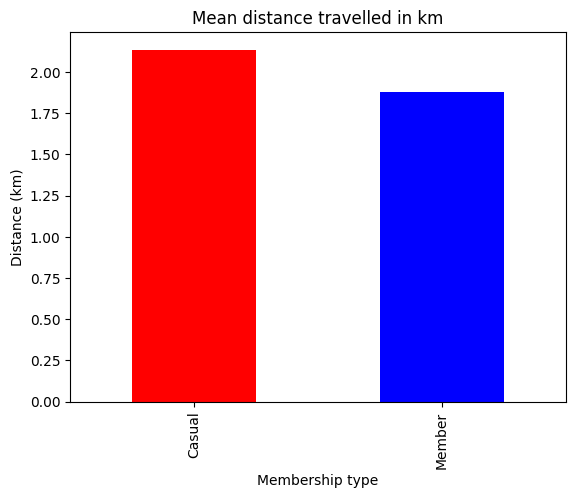

In [82]:
df.groupby("member_casual")['distance_km'].mean().plot(kind = "bar", color = ["red", "blue"])
plt.xlabel("Membership type")
plt.xticks(ticks = range(2), labels = ["Casual", "Member"])
plt.title("Mean distance travelled in km")
plt.ylabel("Distance (km)")

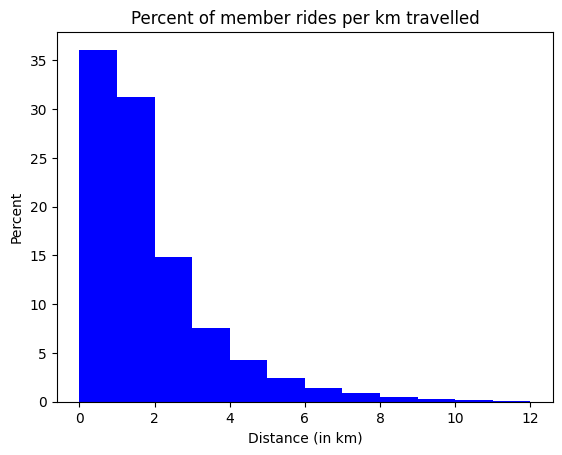

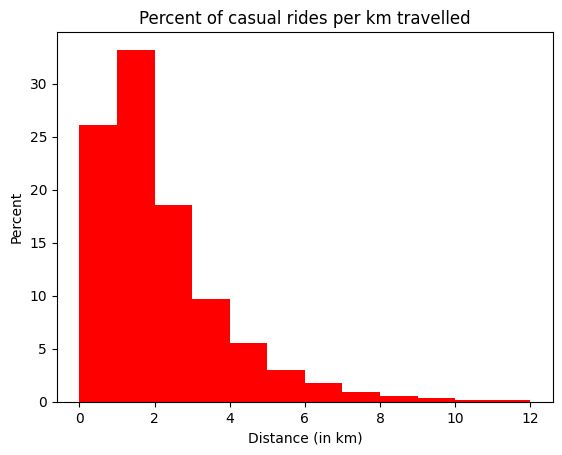

In [54]:
weight = (np.ones(len(member)) * 100) / len(member)
member['distance_km'].plot(kind = "hist", bins = [0,1,2,3,4,5,6,7,8,9,10,11,12], weights = weight, color = "blue")
plt.title("Percent of member rides per km travelled")
plt.xlabel("Distance (in km)")
plt.ylabel("Percent")
plt.show()

weight = (np.ones(len(casual)) * 100) / len(casual)
casual['distance_km'].plot(kind = "hist", bins = [0,1,2,3,4,5,6,7,8,9,10,11,12], weights = weight, color = "red")
plt.title("Percent of casual rides per km travelled")
plt.xlabel("Distance (in km)")
plt.ylabel("Percent")
plt.show()

### Insight:

Member rides are typically short and focused, with a steep distance distribution drop-off beyond 2 km. Casual riders, by contrast, show a wider range of trip distances and a higher mean, indicating they engage in longer, more exploratory trips. This supports the hypothesis that members use CitiBike for commuting or quick hyperlocal travel whereas casual users ride for leisure